<a href="https://colab.research.google.com/github/Joao-Tolentino/lia1_2024_1/blob/main/Entregas-Joao-Tolentino/ML_de_Ponta_a_Ponta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports Necessários**

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Ler o arquivo .csv**

O arquivo contém informações sobre casas em uma cidade com informações relevantes sobre preço, quartos, banheiros, vagas, ar-condicionado, porão, quarto de hóspedes, etc.

In [238]:
#Leitura do arquivo, atribuindo a um dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Casas/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [239]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [240]:
# Verificando se há registros duplicados
df[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [241]:
# Verificando de há valores ausentes
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [243]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [244]:
df.shape

(545, 13)

In [245]:
#criando outro dataframe para alterar informações
base = df.copy()

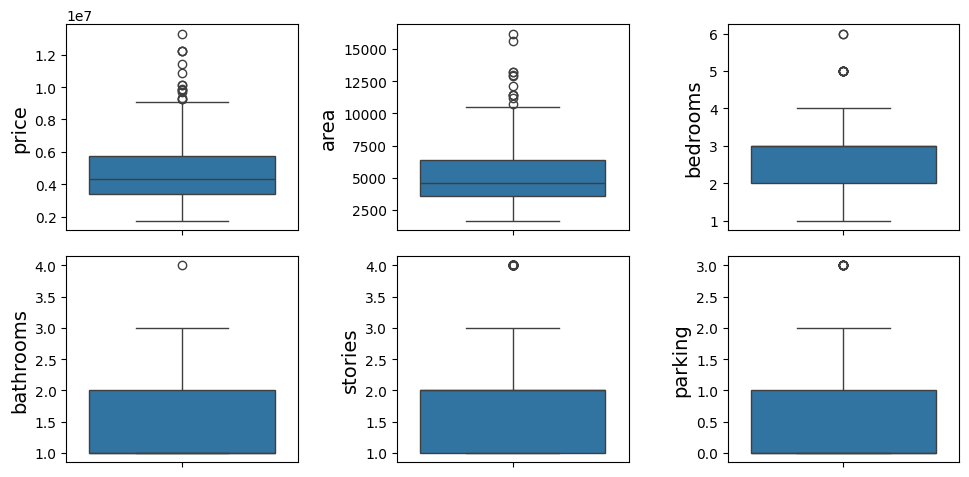

In [246]:
#Gráfico geral dos dados, incluindo outliers
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f142ba8b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f142b7b83d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f142ba89e70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f142b8094b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f142886bc10>],
 'means': []}

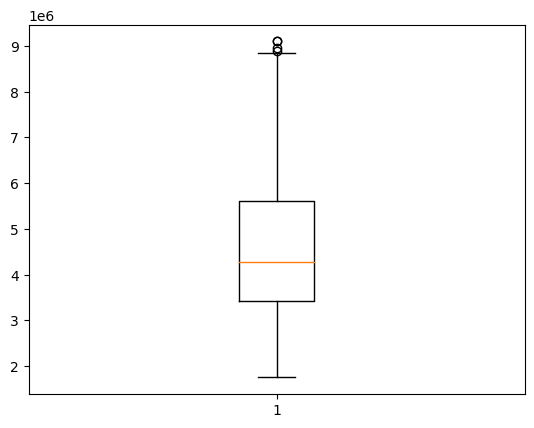

In [247]:
# Lidando com outliers no 'price'
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f14284882b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1428488eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1428488580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1428488160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1428489300>],
 'means': []}

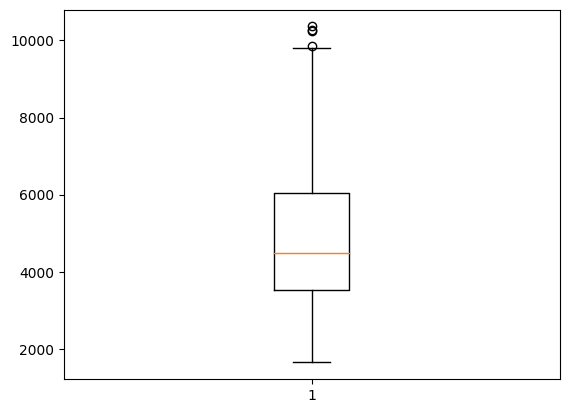

In [248]:
# Lidando com outliers no 'srea'

Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

<Axes: xlabel='furnishingstatus', ylabel='price'>

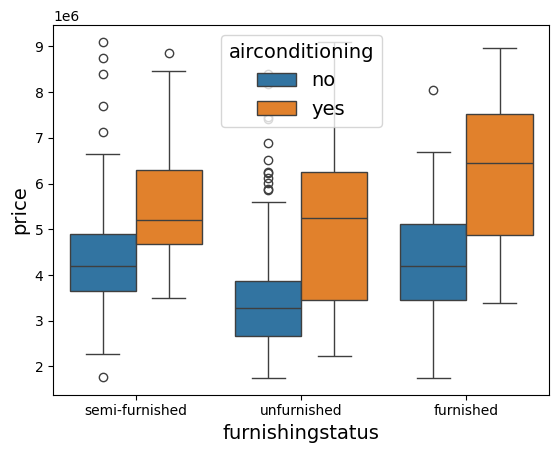

In [249]:
# Grafico para visualizar as relações entre mobilha, ar-condicionado e preço
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='bedrooms', ylabel='Density'>

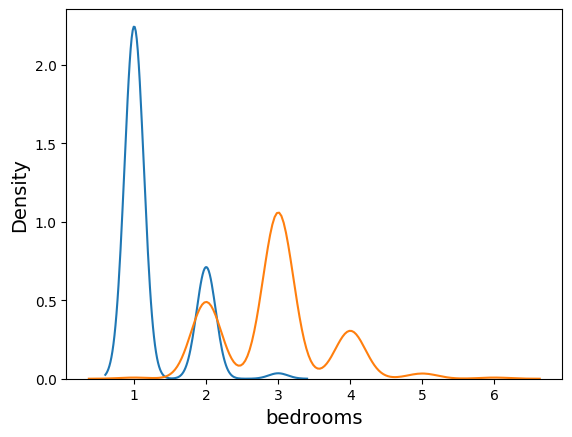

In [250]:
# Gráfio para analisar a densidade de banheiros e quartos
sns.distplot(df["bathrooms"],hist=False) #laranja
sns.distplot(df["bedrooms"],hist=False)  #azul

<Axes: xlabel='parking', ylabel='Density'>

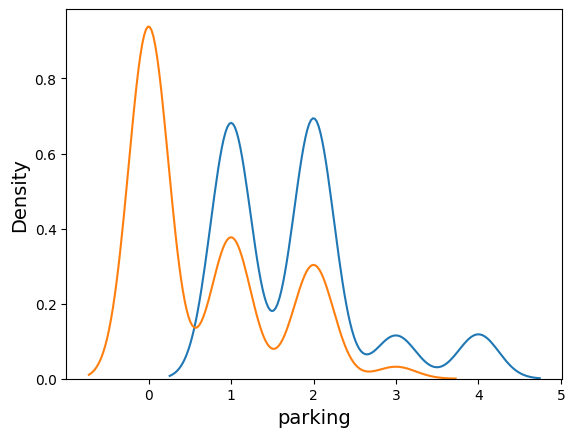

In [251]:
# Gráfio para analisar a densidade de andares e vagas
sns.distplot(df["stories"],hist=False) #laranja
sns.distplot(df["parking"],hist=False) #azul

<Axes: xlabel='area', ylabel='price'>

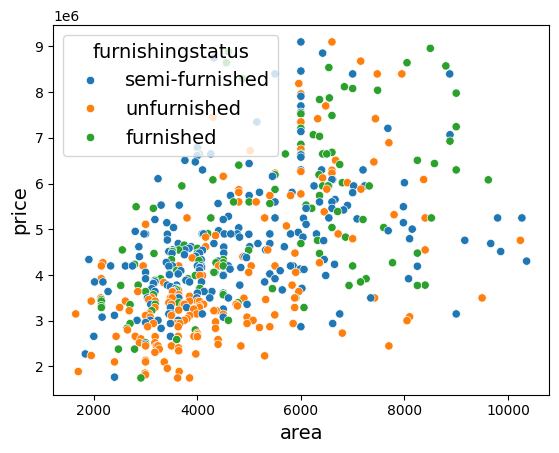

In [252]:
# Grafico para visualizar as relações entre mobilha, area e preço
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

In [253]:
# Modificando os dados 'yes' e 'no' para boolean na forma inteira (true=1 e false=0)
status = pd.get_dummies(base[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True, dtype = int)
base = pd.concat([base, status], axis = 1)
base.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

base.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [254]:
# Criando sets de treino e teste
X = base.drop(['price'],axis=1)
y = base['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [255]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [256]:
# Criando um objeto de regressão linear
regres = linear_model.LinearRegression()

# Treinando um modelo por regressão linear
regres.fit(X_train, y_train)

# Faz uma previsão
y_pred1 = regres.predict(X_test)

Resultado para Regressão Linear : 
Mean Square Error : 1523019469501.2913
R2 Score : 0.6463350878895877


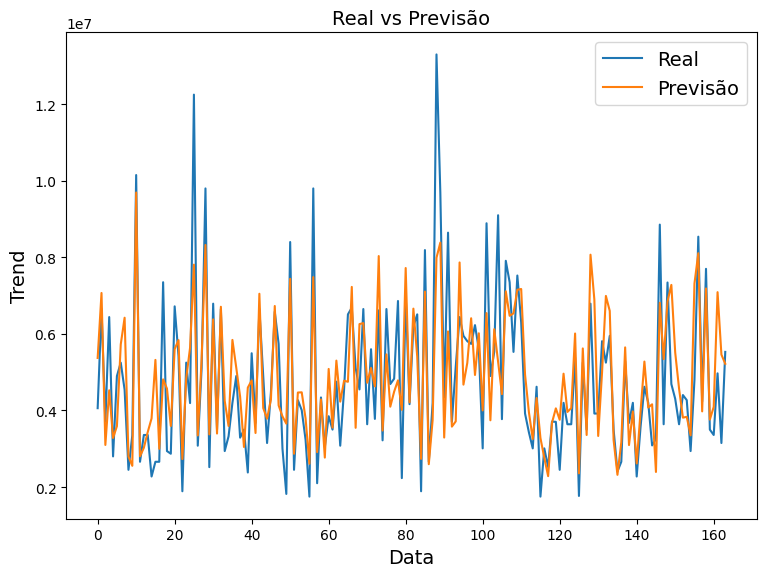

In [257]:
acc = {}
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
acc["Regressão Linear"] = r2
print(f"Resultado para Regressão Linear : ")
print (f"Mean Square Error : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))

# Plot Dados Reais vs. Valores Previsionados
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Real')
plt.plot(np.arange(len(y_test)), y_pred1, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Real vs Previsão')

plt.tight_layout()
plt.show()

In [258]:
# Criando um objeto de regressão por Floresta Randômica
florest = RandomForestRegressor()

# Treinando um modelo por regressão Floresta Randômica
florest.fit(X_train, y_train)

# Faz uma previsão
y_pred2 = florest.predict(X_test)

Resultado para Floresta Randômica : 
Mean Square Error : 1830951188588.5808
R2 Score : 0.5748293412147438


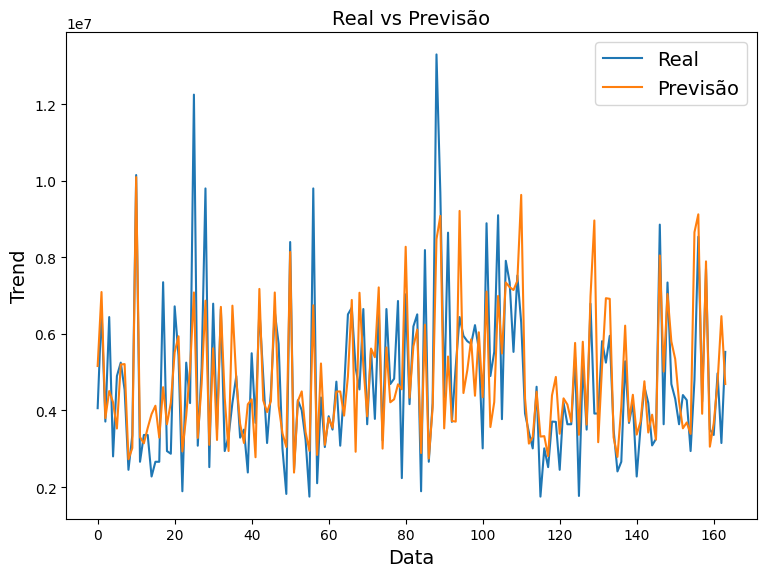

In [259]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
acc["Floresta Randômica"] = r2
print(f"Resultado para Floresta Randômica : ")
print (f"Mean Square Error : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))

# Plot Dados Reais vs. Valores Previsionados
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Real')
plt.plot(np.arange(len(y_test)), y_pred2, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Real vs Previsão')

plt.tight_layout()
plt.show()

In [260]:
# Criando um objeto de regressão Vetor Suporte
support = SVR()

# Treinando um modelo por regressão Vetor Suporte
support.fit(X_train, y_train)

# Faz uma previsão
y_pred3 = support.predict(X_test)

Resultado para Vetor Suporte: 
Mean Square Error : 4462165325262.905
R2 Score : -0.03617277335133684


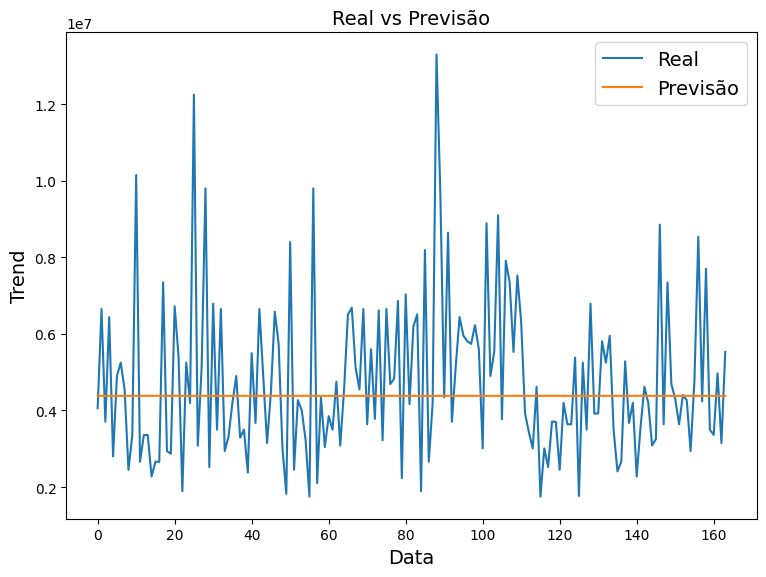

In [261]:
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
acc["Vetor Suporte"] = r2
print(f"Resultado para Vetor Suporte: ")
print (f"Mean Square Error : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))

# Plot Dados Reais vs. Valores Previsionados
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Real')
plt.plot(np.arange(len(y_test)), y_pred3, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Real vs Previsão')

plt.tight_layout()
plt.show()

In [262]:
# Criando um objeto de regressão Lasso
lasso = Lasso()

# Treinando um modelo por regressão Lasso
lasso.fit(X_train, y_train)

# Faz uma previsão
y_pred4 = lasso.predict(X_test)

Resultado para Regressão Lasso: 
Mean Square Error : 1523021266688.3394
R2 Score : 0.6463346705594011


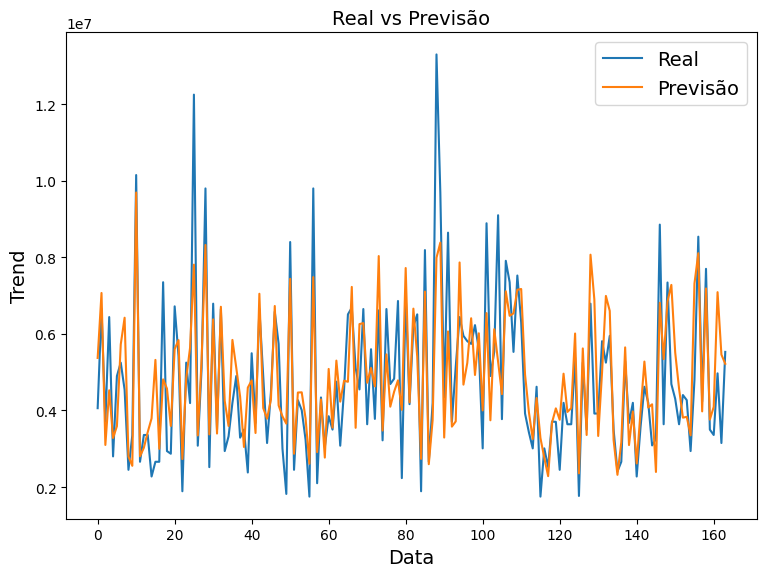

In [263]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
acc["Lasso"] = r2
print(f"Resultado para Regressão Lasso: ")
print (f"Mean Square Error : {mse}")
print(f"R2 Score : {r2}")
plt.figure(figsize=(15, 6))

# Plot Dados Reais vs. Valores Previsionados
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(y_test)), y_test, label='Real')
plt.plot(np.arange(len(y_test)), y_pred4, label='Previsão')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Real vs Previsão')

plt.tight_layout()
plt.show()

In [264]:
#Juntando as precisões dos três modelos para verificação final
final = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
final

,Accuracy
Regressão Linear,0.646335
Floresta Randômica,0.574829
Vetor Suporte,-0.036173
Lasso,0.646335


**Considerações dos Modelos**

Como pode ser visto acima, os algoritmos de Regressão Linear (Linear Regression) e Regressão Lasso (Lasso Regressor), possuem uma precisão similar, enquanto o algoritmo de Floresta Randômica (Random Forest Regressor) e Vetor Support (Support Vector Regressor) possuem uma precisão inferior aos demais. Logo infere-se que os melhores algoritmos para este caso seriam Lasso e Linear, e o pior será o Vetor Suporte (visto que este apresentou precisão negativa).

Portanto, usaremos o Lasso!

In [277]:
# X_train é tudo do dataframe menos o preço, y_train é o preço
lasso_rmses = -cross_val_score(lasso, X_train,y_train,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lasso_rmses).describe()

count    1.000000e+01
mean     1.022664e+06
std      1.885688e+05
min      8.019168e+05
25%      8.480772e+05
50%      1.019621e+06
75%      1.145942e+06
max      1.320857e+06
dtype: float64

In [280]:
#RMSE do algoritmo lasso para o dataframe
final_predictions = lasso.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

1234107.477770206


**Considerações Finais**

O RMSE e sensitivo para escala, visto que o menor valor de preço do dataset é de 1.750.000,00 e o RMSE está em 1.234.107, vemos que o algoritmo teria uma "margem de erro" de 1.234.107 para seus valores previsionados. Mesmo não sendo muito preciso, este algoritmo consegue prever com certa confiabilidade o preço de uma casa a partir de características da mesma. Por fim, como qualquer código de machine learning, este algoritmo poderia ser melhorado.